In [1]:
# Setup session
%run -m m00_the_data

Let's take a look at a histogram of the lengths of documents in terms of the number of characters.

In [2]:
import matplotlib.pyplot as plt

In [3]:
# https://matplotlib.org/api/matplotlib_configuration_api.html#matplotlib.rc
plt.rc('figure', figsize=(10, 7))
plt.rc('font', family='Arial', size=14)

In [4]:
nchars = [len(doc) for doc in docs]

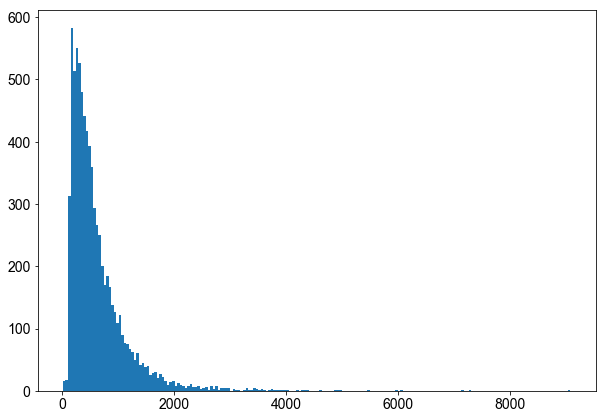

In [5]:
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html
plt.hist(nchars, bins=200)
plt.show()

We try extracting the words of each document by spitting it by whitespace.

In [6]:
def tokenize(doc):
    return doc.split(' ')

#tokenize(docs[1])

In [7]:
bagofwords = [tokenize(doc) for doc in docs]

In [8]:
nwords = [len(words) for words in bagofwords]

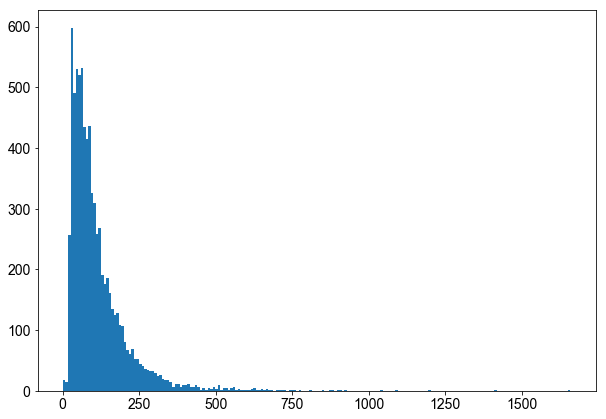

In [9]:
plt.hist(nwords, bins=200)
plt.show()

We can compute some statistics about the data

In [10]:
from collections import Counter

In [11]:
wcount = Counter()
for words in bagofwords:
    wcount.update(words)

In [12]:
#wcount.most_common()

We can create a histogram of the top 30 words in our data set.

In [13]:
def word_hist(words, freq):
    plt.bar(words, freq, width=0.3)
    plt.xticks(rotation=30, ha='right')
    
    plt.show()

In [14]:
wcount = wcount.most_common()

In [15]:
n=20
word = dict(wcount[:n]).keys()
freq = dict(wcount[:n]).values()

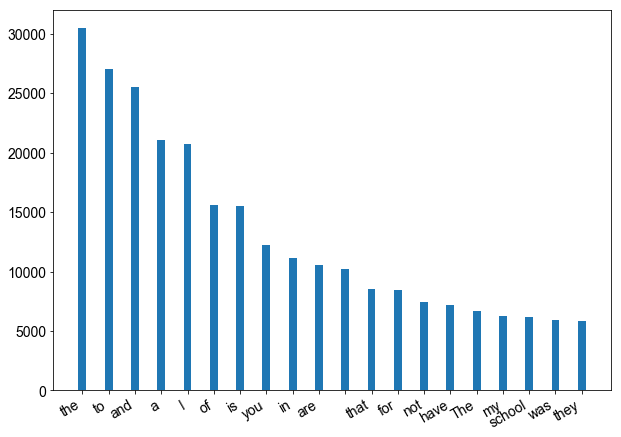

In [16]:
word_hist(word, freq)

There is a prebuilt list of stopwords available at nltk

In [17]:
from nltk.corpus import stopwords
nltk_stopwords = stopwords.words('english')

In [18]:
from gensim.parsing.preprocessing import STOPWORDS
gensim_stopwords = list(STOPWORDS)

C:\anaconda\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [19]:
wcount = dict(wcount)

In [20]:
for s in nltk_stopwords:
    wcount.pop(s, None)

In [21]:
for s in gensim_stopwords:
    wcount.pop(s, None)

Having removed the stop words, we can make a new plot showing the words.

In [22]:
n=20
word = list(wcount.keys())[:n]
freq = list(wcount.values())[:n]

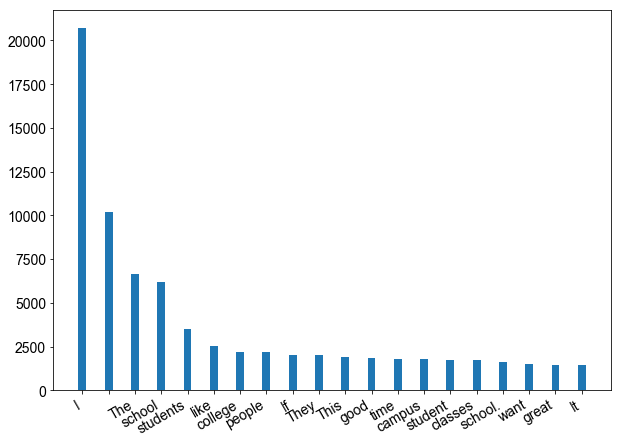

In [23]:
word_hist(word, freq)

The topics have started to reveal themselves. We might be able to filter out more meaningless words like `I`, `The`. This is probably because of the letter case of the text. We can make a function to make all our text lowercase and strip out any punctuation.

In [24]:
import string

translator = str.maketrans('', '', string.punctuation)

def strippunct(w):
    '''Removes the punctuation from a string.
    '''
    return w.translate(translator)

def lowercase(w):
    '''Makes the text lower case and strips out punctuation.
    '''
    return w.lower()

In [25]:
def reduce(wlist):
    '''Applies lower case and strips punctuation in a list.'''
    return [strippunct(lowercase(w)) for w in wlist]

Now, we can apply the function to both the stopwords and the original bag of words

In [26]:
gensim_stopwords = reduce(gensim_stopwords)
nltk_stopwords = reduce(nltk_stopwords)

In [27]:
wcount = Counter()
for words in bagofwords:
    wcount.update(reduce(words))

In [28]:
for s in nltk_stopwords:
    wcount.pop(s, None)

In [29]:
for s in gensim_stopwords:
    wcount.pop(s, None)

In [30]:
wcount.pop('', None)

11513

In [31]:
wcount = wcount.most_common()

In [32]:
n=20
word = dict(wcount[:n]).keys()
freq = dict(wcount[:n]).values()

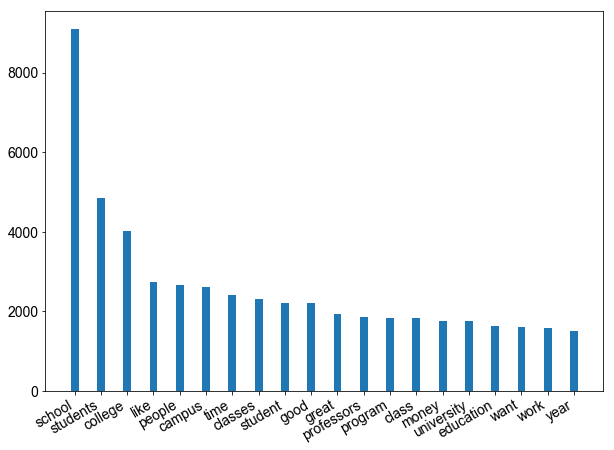

In [33]:
word_hist(word, freq)

These topics seem like good candidates for topics and already somewhat tells us about the subjects in the documents.